In [10]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

%matplotlib inline
plt.style.use('ggplot')

import warnings
warnings.filterwarnings("ignore")


%store -r WORKDIR

if 'WORKDIR' not in dir():
    WORKDIR = 'C:/Users/Paulo/Desktop/infnet-projeto-final/mit_data_science/'

data_raw_file = WORKDIR + '/Data/Raw/nyctaxi_data_collect_green.parquet'
data_proc_file = WORKDIR + '/Data/Processed/nyctaxi_data_modeling_green.parquet'


pd.plotting.register_matplotlib_converters()

# Leitura dos Dados 

In [11]:
data = pd.read_parquet(data_raw_file)

print('shape:', data.shape)
print('columns:', data.columns)
data.head()

shape: (7000, 8)
columns: Index(['dropoff_latitude', 'dropoff_longitude', 'fare_amount',
       'lpep_dropoff_datetime', 'lpep_pickup_datetime', 'passenger_count',
       'pickup_latitude', 'pickup_longitude'],
      dtype='object')


,dropoff_latitude,dropoff_longitude,fare_amount,lpep_dropoff_datetime,lpep_pickup_datetime,passenger_count,pickup_latitude,pickup_longitude
0,None,None,9,2017-01-01T00:11:05.000,2017-01-01T00:01:15.000,1,None,None
1,None,None,6.5,2017-01-01T00:09:00.000,2017-01-01T00:03:34.000,1,None,None
2,None,None,12,2017-01-01T00:12:55.000,2017-01-01T00:04:02.000,5,None,None
3,None,None,10.5,2017-01-01T00:14:23.000,2017-01-01T00:01:40.000,1,None,None
4,None,None,11.5,2017-01-01T00:18:55.000,2017-01-01T00:00:51.000,1,None,None


# Estatistica dos dados 

In [12]:
data.describe()

,dropoff_latitude,dropoff_longitude,fare_amount,lpep_dropoff_datetime,lpep_pickup_datetime,passenger_count,pickup_latitude,pickup_longitude
count,4000,4000,7000,7000,7000,7000,4000,4000
unique,3804,3579,120,5331,5482,6,3712,3377
top,0,0,5,2013-10-02T23:22:54.000,2013-10-02T23:17:00.000,1,0,0
freq,30,30,324,16,16,5737,31,31


In [13]:
data.dtypes

dropoff_latitude         object
dropoff_longitude        object
fare_amount              object
lpep_dropoff_datetime    object
lpep_pickup_datetime     object
passenger_count          object
pickup_latitude          object
pickup_longitude         object
dtype: object

# Correção do tipo dos dados

In [14]:
data['pickup_datetime'] = pd.to_datetime(data.lpep_pickup_datetime, format='%Y-%m-%d %H:%M:%S')
data['dropoff_datetime'] = pd.to_datetime(data.lpep_dropoff_datetime, format='%Y-%m-%d %H:%M:%S')
data.drop(['lpep_dropoff_datetime', 'lpep_pickup_datetime'], axis = 1, inplace = True)

data_types = {
    'fare_amount': float,
    'pickup_latitude': float,
    'pickup_longitude': float,
    'dropoff_latitude': float,
    'pickup_latitude': float,
    'dropoff_longitude': float,  
    'passenger_count': int
}
for cname, dtype in data_types.items():
    if dtype == np.float32:
        data.loc[data[cname].astype(str) == '',cname] = '0'
    
    data[cname] = data[cname].astype(dtype)
    
data.describe()

,dropoff_latitude,dropoff_longitude,fare_amount,passenger_count,pickup_latitude,pickup_longitude
count,4000.000000,4000.000000,7000.000000,7000.000000,4000.000000,4000.000000
mean,40.449147,-73.378270,12.313643,1.475571,40.441422,-73.360332
std,3.517141,6.379682,9.819976,1.202216,3.575008,6.484315
min,0.000000,-74.257263,-5.000000,1.000000,0.000000,-74.035309
25%,40.710144,-73.963024,6.500000,1.000000,40.710790,-73.957802
50%,40.752684,-73.941734,9.500000,1.000000,40.750307,-73.942280
75%,40.801377,-73.906876,15.500000,1.000000,40.805650,-73.912397
max,40.974236,0.000000,400.000000,6.000000,40.903797,0.000000


In [15]:
data.dtypes

dropoff_latitude            float64
dropoff_longitude           float64
fare_amount                 float64
passenger_count               int32
pickup_latitude             float64
pickup_longitude            float64
pickup_datetime      datetime64[ns]
dropoff_datetime     datetime64[ns]
dtype: object

In [16]:
### Convertendo a distancia de milhas para kilometros

# Verificar Valores Nulos

In [21]:
data.isna().sum()

dropoff_latitude     3000
dropoff_longitude    3000
fare_amount             0
passenger_count         0
pickup_latitude      3000
pickup_longitude     3000
pickup_datetime         0
dropoff_datetime        0
dtype: int64

In [62]:
data.dropna(inplace = True)
data.drop(['dropoff_datetime'], axis = 1, inplace = True)

In [63]:
data.isna().sum()

dropoff_latitude     0
dropoff_longitude    0
fare_amount          0
passenger_count      0
pickup_latitude      0
pickup_longitude     0
pickup_datetime      0
dtype: int64

In [64]:
data.shape

(3942, 7)

# Variável Alvo 

In [65]:
data.groupby('fare_amount').fare_amount.last().sort_values(ascending=False).head(10)

fare_amount
99.5    99.5
96.0    96.0
76.0    76.0
71.5    71.5
67.5    67.5
65.5    65.5
64.5    64.5
60.0    60.0
58.0    58.0
56.0    56.0
Name: fare_amount, dtype: float64

## Verificação das Variáveis

#### pickup_datetime

In [66]:
data['pickup_datetime'].describe()

count                    3942
unique                   3695
top       2016-01-01 00:36:32
freq                        6
first     2013-08-10 23:24:06
last      2016-01-01 00:47:54
Name: pickup_datetime, dtype: object

Plotando um histograma para verificar a distribuição

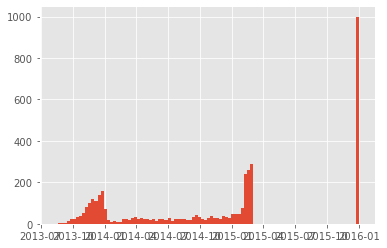

In [67]:
plt.hist(data['pickup_datetime'], bins = 100);

### Coordenadas

#### `pickup_longitude`

In [68]:
plon = data['pickup_longitude']
plon.describe()

count    3942.000000
mean      -73.933483
std         0.039888
min       -74.035309
25%       -73.957874
50%       -73.942692
75%       -73.913881
max       -73.781517
Name: pickup_longitude, dtype: float64

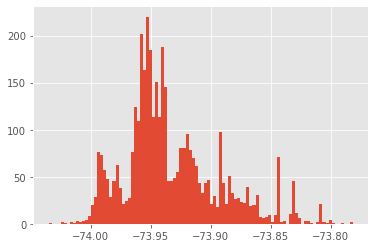

In [69]:
plt.hist(plon, bins = 100);

In [70]:
plon.median()

-73.94269180297852

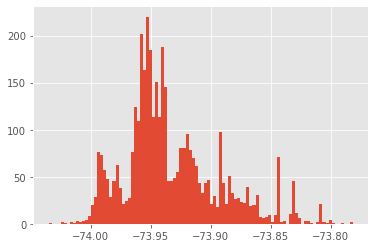

In [71]:
plt.hist(plon[(plon > plon.median() - 1.5) & (plon < plon.median() + 1.5)], bins = 100);

Criando uma condição para pegar somente as coordenadas dentro do intervalo do zoom.

In [72]:
plon_val = (plon > plon.median() - 0.5) & (plon < plon.median() + 0.5)

In [73]:
plon_val.value_counts()

True    3942
Name: pickup_longitude, dtype: int64

In [74]:
print(plon_val.value_counts(), '\n', plon_val.value_counts(normalize = True))

True    3942
Name: pickup_longitude, dtype: int64 
 True    1.0
Name: pickup_longitude, dtype: float64


Podemos verificar que os valores 'outliers' representam 1.7% da base, então poderemos remove-los sem impactar nossa analise

#### pickup_latitude


In [75]:
plat = data['pickup_latitude']
plat.describe()

count    3942.000000
mean       40.757171
std         0.057634
min        40.575535
25%        40.711871
50%        40.750870
75%        40.805726
max        40.903797
Name: pickup_latitude, dtype: float64

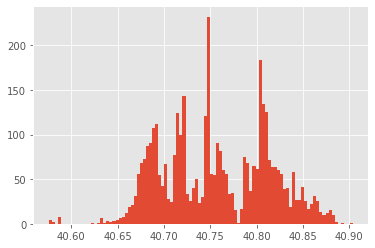

In [76]:
plt.hist(plat, bins = 100);

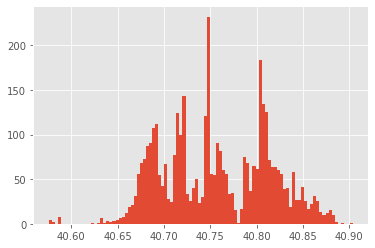

In [77]:
plt.hist(plat[(plat > plat.median() - 2.5) & (plat < plat.median() + 2.5)], bins = 100);

In [78]:
plat_val = (plat > plat.median() - 0.5) & (plat < plat.median() + 0.5)
print(plat_val.value_counts(), '\n', plat_val.value_counts(normalize = True))

True    3942
Name: pickup_latitude, dtype: int64 
 True    1.0
Name: pickup_latitude, dtype: float64


#### dropoff_longitude

In [79]:
dlon = data['dropoff_longitude']
dlon.describe()

count    3942.000000
mean      -73.932997
std         0.047259
min       -74.257263
25%       -73.963221
50%       -73.942089
75%       -73.908369
max       -73.689034
Name: dropoff_longitude, dtype: float64

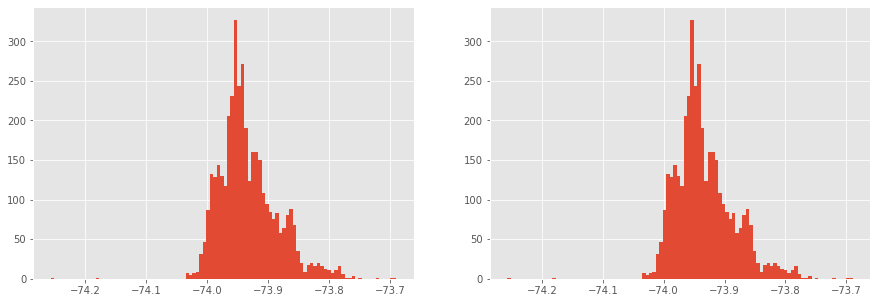

In [80]:
fig, ax = plt.subplots(1, 2, figsize = (15, 5))
ax[0].hist(dlon, bins = 100)
ax[1].hist(dlon[(dlon > dlon.median() - 2.5) & (dlon < dlon.median() + 2.5)], bins = 100);

In [81]:
dlon_val = (dlon > dlon.median() - 0.5) & (dlon < dlon.median() + 0.5)
print(dlon_val.value_counts(), '\n', dlon_val.value_counts(normalize = True))

True    3942
Name: dropoff_longitude, dtype: int64 
 True    1.0
Name: dropoff_longitude, dtype: float64


#### dropoff_latitude


In [82]:
dlat = data['dropoff_latitude']
dlat.describe()

count    3942.000000
mean       40.754632
std         0.058985
min        40.576553
25%        40.710999
50%        40.752859
75%        40.801432
max        40.974236
Name: dropoff_latitude, dtype: float64

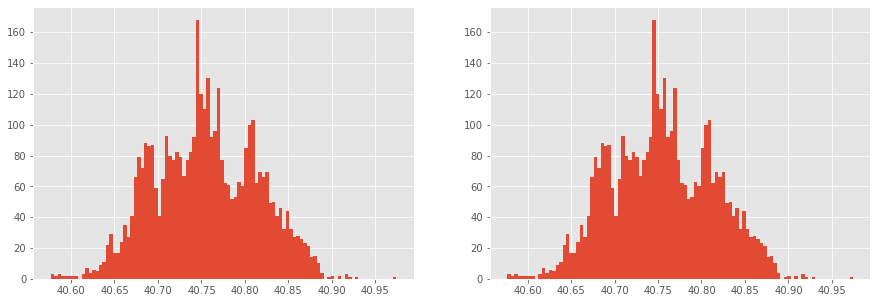

In [83]:
fig, ax = plt.subplots(1, 2, figsize = (15, 5))
ax[0].hist(dlat, bins = 100)
ax[1].hist(dlat[(dlat > dlat.median() - 2.5) & (dlat < dlat.median() + 2.5)], bins = 100);

In [84]:
dlat_val = (dlat > dlat.median() - 0.5) & (dlat < dlat.median() + 0.5)
print(dlat_val.value_counts(), '\n', dlat_val.value_counts(normalize = True))

True    3942
Name: dropoff_latitude, dtype: int64 
 True    1.0
Name: dropoff_latitude, dtype: float64


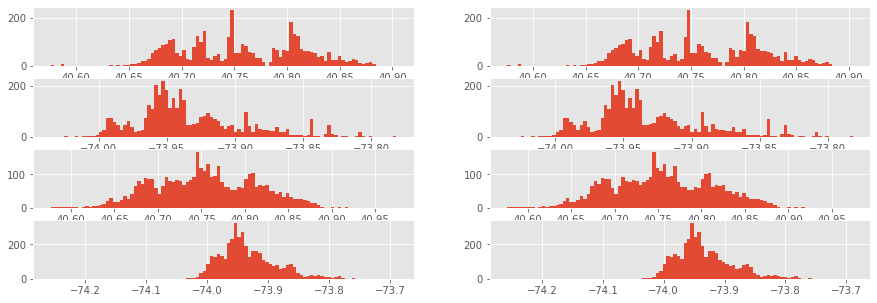

In [85]:
fig, ax = plt.subplots(4, 2, figsize = (15, 5))
ax[0,0].hist(plat, bins = 100)
ax[0,1].hist(plat[(plat > plat.median() - 2.5) & (plat < plat.median() + 2.5)], bins = 100);
ax[1,0].hist(plon, bins = 100)
ax[1,1].hist(plon[(plon > plon.median() - 2.5) & (plon < plon.median() + 2.5)], bins = 100);
ax[2,0].hist(dlat, bins = 100)
ax[2,1].hist(dlat[(dlat > dlat.median() - 2.5) & (dlat < dlat.median() + 2.5)], bins = 100);
ax[3,0].hist(dlon, bins = 100)
ax[3,1].hist(dlon[(dlon > dlon.median() - 2.5) & (dlon < dlon.median() + 2.5)], bins = 100);

### Inteiros

#### `passenger_count`

In [86]:
pcnt = data['passenger_count']
pcnt.describe()

count    3942.000000
mean        1.457636
std         1.166915
min         1.000000
25%         1.000000
50%         1.000000
75%         1.000000
max         6.000000
Name: passenger_count, dtype: float64

Verificar quantos valores igual a zero e a média deles

In [87]:
print((pcnt == 0).sum(), (pcnt == 0).mean())

0 0.0


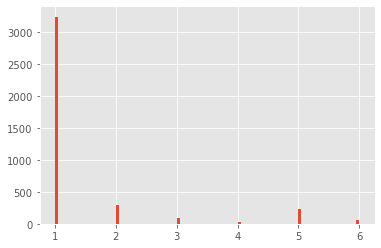

In [88]:
plt.hist(pcnt, bins = 100);

In [89]:
pcnt_val = (pcnt >= 1) & (pcnt <= 6)
print(pcnt_val.value_counts(), '\n', pcnt_val.value_counts(normalize = True))

True    3942
Name: passenger_count, dtype: int64 
 True    1.0
Name: passenger_count, dtype: float64


### Floats

#### `fare_amount`

In [90]:
fare = data['fare_amount']
fare.describe()

count    3942.000000
mean       12.150736
std         8.405955
min         2.500000
25%         6.500000
50%         9.500000
75%        15.500000
max        99.500000
Name: fare_amount, dtype: float64

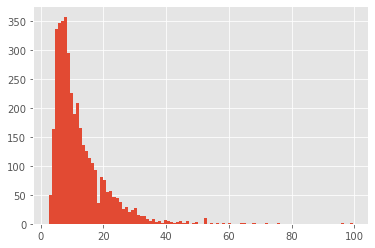

In [91]:
plt.hist(fare, bins = 100);

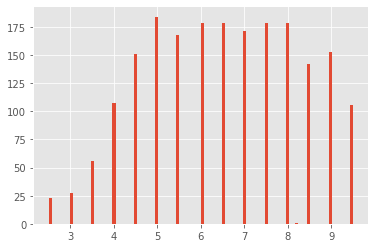

In [92]:
plt.hist(fare[fare < 10], bins = 100);

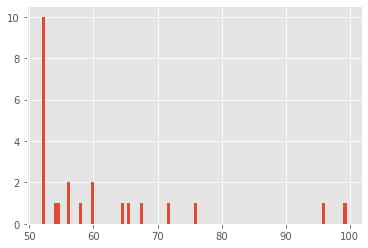

In [93]:
plt.hist(fare[fare > 50], bins = 100);

Removendo os outliers

In [94]:
fare_val = (fare > 2) & (fare < 150)
print(fare_val.value_counts(), '\n', fare_val.value_counts(normalize = True))

True    3942
Name: fare_amount, dtype: int64 
 True    1.0
Name: fare_amount, dtype: float64


Unindo todas as analises realizadas para exclusão dos registros em lote

In [95]:
val_entries = fare_val & plon_val & plat_val & dlon_val & dlat_val & pcnt_val

In [96]:
print(val_entries.value_counts(), '\n', val_entries.value_counts(normalize = True))

True    3942
dtype: int64 
 True    1.0
dtype: float64


POdemos verificar que os registros inconsistentes representam 2.2% da nossa base, então não teremos tanto impacto para remove-los

In [97]:
data = data.drop(val_entries[val_entries == False].index)

In [98]:
data.head()

,dropoff_latitude,dropoff_longitude,fare_amount,passenger_count,pickup_latitude,pickup_longitude,pickup_datetime
3000,40.698044,-73.924278,8.0,1,40.680611,-73.928642,2016-01-01 00:29:24
3001,40.761379,-73.923920,15.5,1,40.723175,-73.952675,2016-01-01 00:19:39
3002,40.646072,-74.013161,16.5,1,40.676105,-73.971611,2016-01-01 00:19:33
3003,40.689034,-74.000648,13.5,1,40.669579,-73.989502,2016-01-01 00:22:12
3004,40.663013,-73.940720,12.0,1,40.682854,-73.964729,2016-01-01 00:24:01


In [99]:
data.shape

(3942, 7)

# Exportar Base de Dados 

In [100]:
data.to_parquet(data_proc_file)